<a href="https://colab.research.google.com/github/Gabrielasants7/NLP/blob/main/C%C3%B3pia_de_projeto_NLP_%2C_B%C3%A1sico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Projeto (NLP) 
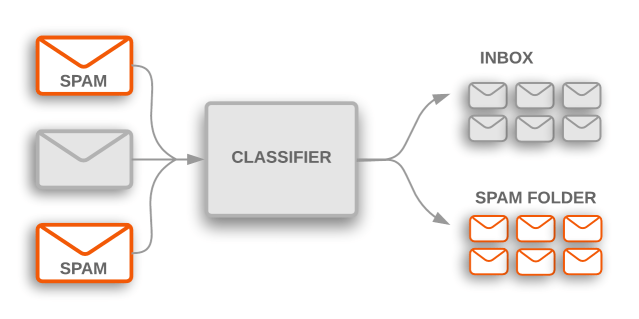

## Escopo do Projeto 
1. Definição da Temática
2. Panorama Geral
2. Objetivo
4. Inicialização
5. EDA
6. Visualizando os Dados para obter mais informações 
7. Pré-Processamento
7. Regressão Logística
8. LightGBM
10. Conclusão 

##Definição da Temática

A inteligência artificial abandonou o âmbito da ficção científica e está se infiltrando silenciosamente em nossas vidas , Ela já faz parte do nosso dia a dia, A realidade de máquinas falando e respondendo a nós de maneira humana já é uma realidade, O processamento de linguagem natural (NLP) é um campo localizado na interseção da ciência de dados e da Inteligência Artificial (IA), alguns campos comumente utilizados em NLP  .

*campos de aplicação* :

Classificação de texto: consiste em atribuir um conjunto de categorias pré-definidas a um determinado texto. Classificadores de texto podem ser usados ​​para organizar, estruturar e categorizar um conjunto de textos.

Reconhecimento de caracteres: permite extrair, do reconhecimento de caracteres, as principais informações de recibos, faturas, cheques, documentos legais de faturamento, etc.

Correção automática: a maioria dos editores de texto atuais está equipada com um corretor ortográfico que permite verificar se há erros de ortografia no texto.

Resumo automático: os métodos de NLP também são usados ​​para produzir resumos curtos, precisos e fluidos de um documento de texto mais longo.




##Panorama Geral 

Esse projeto introdutório de NLP , tem como  ideia central a classificação de texto . Designadamente, a deteccão de Spam.
Para isso utilizarei,  Regressão logística, e o classificador  LightGBM que é considerado bom para classificação de texto . 


Por que , Regressão Logística?

Regressão Logística é um dos algoritmos comumente usados em aprendizado de máquina para problemas de classificação binária, que são problemas com  dois valores de classes , incluindo previsões como "isto ou aquilo", "Sim ou Não", e "A OU B." 
Além disso a Regressão Logística pode estimar a probabilidade dos eventos, incluindo a determinação de uma relação entre as características e as probabilidades de eventos .

Por que , o  LightGBM ?

Light GBM é um algoritmo relativamente novo , comparado a outros , porém é um classificador que tem como características: Velocidade de treinamento , maior eficiência, Melhor precisão, Suporte de aprendizado paralelo e GPU.
Dito isso , resolvir contrastar com a Regressão Logística e explorar qual tem o melhor desempenho perante ao objetivo do projeto .

##Objetivo
O objetivo do projeto consiste em atribuir, um conjunto de categorias pré-definidas (spam ou não), o desígnio é organizar, estruturar e categorizar .

##Inicializando

In [ ]:
#Importando as Bibliotecas 
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import pandas as pd
import nltk
nltk.download( 'stopwords' )
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregando o dataset
email = pd.read_csv('/content/drive/MyDrive/Spam Email raw text for NLP.csv')
email 

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


In [ ]:
#Visualizando as cinco últimas linhas do dataset
email.tail()

,CATEGORY,MESSAGE,FILE_NAME
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0
5795,0,"If you run Pick, and then use the ""New FTOC"" b...",00747.352d424267d36975a7b40b85ffd0885e


##EDA

In [ ]:
#Descritiva
email.describe()

,CATEGORY
count,5796.000000
mean,0.327122
std,0.469203
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
#Informações
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


In [ ]:
#Observando se há dados duplicados 
email.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
5791    False
5792    False
5793    False
5794    False
5795    False
Length: 5796, dtype: bool

In [ ]:
#Dados nulos
email.isna().sum()


CATEGORY     0
MESSAGE      0
FILE_NAME    0
dtype: int64

## Visualizando

Qual é a proporção de spam e não spam ?

In [ ]:
email.to_csv("Spam Email raw text for NLP.csv",index=False)


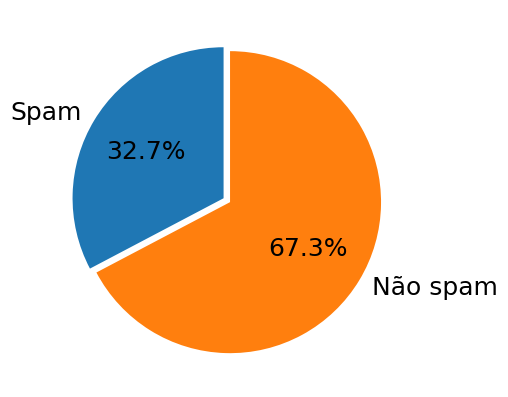

In [ ]:
#plotando o gráfico para visualizar a proporção 
category_names = ['Spam',"Não spam"]
size = [email.CATEGORY.value_counts()[1],email.CATEGORY.value_counts()[0]]

plt.figure(figsize=(5,5), dpi=100)
plt.pie(size, labels=category_names, textprops={'fontsize':18}, startangle=90, autopct='%1.1f%%',
 explode=[0,0.05],)

plt.show()

In [ ]:
#Observando a proporção em números inteiros , 0 --> Não é spam, 1--> Spam , 0  
email["CATEGORY"].value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


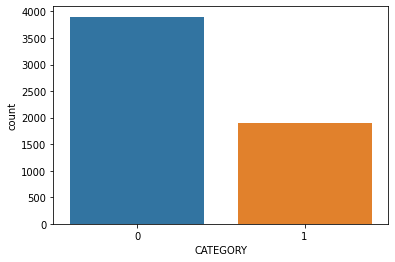

In [ ]:
#0 --> Não é spam
#1 --> Spam
sns.countplot(email["CATEGORY"])


In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

##Pré-Processamento 
O Pré-Processamento irá consistir em ; Limpeza , Lematização, Conversão

In [ ]:
#Removendo pontuação e palavras paradas 
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# Mostrar a tokenização
email['MESSAGE'].head().apply(process)

0    [Dear, Homeowner, Interest, Rates, lowest, poi...
1    [ATTENTION, MUST, Computer, Users, NEWSpecial,...
2    [multipart, message, MIME, format, NextPart000...
3    [IMPORTANT, INFORMATION, new, domain, names, f...
4    [bottom, line, GIVE, AWAY, CDs, FREE, people, ...
Name: MESSAGE, dtype: object

In [ ]:
#Lematização
lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(0, len(email)):
    message = re.sub('[^a-zA-Z]', ' ', email['MESSAGE'][i])
    message = message.split()
    message =[word for word in message if not word in set(stopwords.words('english'))]
    message = [lemmatizer.lemmatize(word) for word in message]
    message = ' '.join(message)
    corpus.append(message)

In [ ]:
#convertendo o texto em uma matriz de contagens de token
from sklearn.feature_extraction.text import CountVectorizer
message = CountVectorizer(analyzer=process).fit_transform(email['MESSAGE'])

In [ ]:
#Aplicando tfidf
tfidf = TfidfVectorizer(ngram_range=(1, 3))
X = tfidf.fit_transform(corpus)
y = email["CATEGORY"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(message, email['CATEGORY'], test_size=0.30, random_state=0)
# 
print(message.shape)

(5796, 137833)


##Regressão logística

A regressão logística é um algoritmo de aprendizado de máquina para classificação. Neste algoritmo, as probabilidades que descrevem os possíveis resultados de uma única tentativa são modeladas usando uma função logística.

In [ ]:
#Dividindo o conjunto de dados 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
#Treinando o modelo
log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X_train,y_train)



LogisticRegression(class_weight='balanced')

In [ ]:
#Fazendo a predição com o modedelo treinado
y_pred = log_model.predict(X_test)

In [ ]:
#Avaliando a perfomance
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1559
           1       0.99      0.93      0.96       760

    accuracy                           0.97      2319
   macro avg       0.98      0.96      0.97      2319
weighted avg       0.97      0.97      0.97      2319



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9728331177231565
Precision: 0.9874125874125874
Recall: 0.9289473684210526


## Lightgbm 
LightGBM é uma estrutura de aumento de gradiente que usa algoritmos de aprendizado baseados em árvore. Ele foi projetado para ser distribuído e eficiente com as seguintes vantagens:

Melhor precisão,
Velocidade de treinamento mais rápida e consequetemente, maior  eficiência,
Menor uso de memória,
Suporte de aprendizado paralelo e GPU.


In [ ]:
#Treinando o Modelo
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)


LGBMClassifier()

In [ ]:
#Predição do modelo
y_pred=clf.predict(X_test)

In [ ]:
#Visualizando a precisão
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,y_pred))
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1559
           1       0.97      0.98      0.98       760

    accuracy                           0.98      2319
   macro avg       0.98      0.98      0.98      2319
weighted avg       0.98      0.98      0.98      2319

LightGBM Model accuracy score: 0.9840


In [ ]:
y_pred_train = clf.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [ ]:
#Verificando se há Overfitting
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9840


Devido a aproximação nos resultados , pode-se afirmar que não há Overfitting.

In [ ]:
#Imprimindo a Matriz de Confusão e simplificando
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1539   20]
 [  17  743]]

True Positives(TP) =  1539

True Negatives(TN) =  743

False Positives(FP) =  20

False Negatives(FN) =  17


In [ ]:
#Matriz de confusão
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1559
           1       0.97      0.98      0.98       760

    accuracy                           0.98      2319
   macro avg       0.98      0.98      0.98      2319
weighted avg       0.98      0.98      0.98      2319



In [ ]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_pred, y_test)
print("Accuracy of LightGBM Model:", acc*100,"%")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1559
           1       0.97      0.98      0.98       760

    accuracy                           0.98      2319
   macro avg       0.98      0.98      0.98      2319
weighted avg       0.98      0.98      0.98      2319

Accuracy of LightGBM Model: 98.40448469167745 %


##Conclusão

Baseado na Modelagem acima , É possível afirmar que a precisão dos dois modelos introduzidos no projeto tiveram uma aproximação na porcentagem de acurácia dos resultados, entretanto, o modelo LightGBM teve uma pequena vantagem em relação a Regressão logística.
LightGBM ,
98.40 X  97.28,  Regressão logística .